# Problem Statement

You work in an event management company. On Mother's Day, your company has organized an event where they want to cast positive Mother's Day related tweets in a presentation. Data engineers have already collected the data related to Mother's Day that must be categorized into positive, negative, and neutral tweets.

You are appointed as a Machine Learning Engineer for this project. Your task is to build a model that helps the company classify these sentiments of the tweets into positive, negative, and neutral.

<b> Target Variable: sentiment_class <b>

<table>						
<tr>	<th>	Column Name	</th> <th>	Description	</th>	</tr>
<tr>	<td>	id	</td> <td>	ID of tweet	</td>	</tr>
<tr>	<td>	original_text	</td> <td>	Text of tweet	</td>	</tr>
<tr>	<td>	lang	</td> <td>	Language of tweet	</td>	</tr>
<tr>	<td>	retweet_count	</td> <td>	Number of times retweeted	</td>	</tr>
<tr>	<td>	original_author	</td> <td>	Twitter handle of Author	</td>	</tr>
<tr>	<td>	sentiment_class	</td> <td>	Sentiment of Tweet (Target)	</td>	</tr>
</table>						

# Phase1: Model Building On Training Data

# Step1: Read Data

In [25]:
train = pd.read_csv("train.csv")
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [26]:
train.shape

(3235, 6)

In [27]:
train.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class'],
      dtype='object')

# Step2: Exploratory Data Analysis

## 2.1 Missing Data Analysis 

In [28]:
train.isnull().sum()

id                 0
original_text      0
lang               4
retweet_count      4
original_author    0
sentiment_class    0
dtype: int64

## 2.2 Data Type Analysis 

In [29]:
train.dtypes

id                 float64
original_text       object
lang                object
retweet_count       object
original_author     object
sentiment_class      int64
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [30]:
train.describe()

,id,sentiment_class
count,3.235000e+03,3235.000000
mean,1.245344e+18,-0.001236
std,8.014866e+14,0.688719
min,1.243909e+18,-1.000000
25%,1.244672e+18,0.000000
50%,1.245406e+18,0.000000
75%,1.246039e+18,0.000000
max,1.246734e+18,1.000000


In [31]:
train.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class'],
      dtype='object')

# Step3: Data Cleaning

In [33]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [61]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# DOWNLOAD VADER_LEXICON FOR CALCULATING SENTIMENT INTENSITY
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bhuwanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bhuwanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [36]:
#FUNCTION TO FIND POLARITY SCORE
def polar_score(text):
    score = sid.polarity_scores(text)
    x = score['compound']
    return x


In [37]:
#CREATING A COLUMN NAMED CLEAN_TEXT WHICH STORES CLEANED TEXT 
train['clean_text']=train['original_text'].apply(lambda x: tweet_to_words(x))

#CREATING A COLUMN NAMED COMPOUND SCORE WITH SENTIMENT INTENSITY AS ITS VALUE 
train['compound_score'] = train['original_text'].apply(lambda x : polar_score(x))

#CREATING A COLUMN NAMED LENGTH WITH LENGTH OF REVIEWS AS ITS VALUE
train['length'] = train['clean_text'].apply(lambda x: len(x) - x.count(" "))

In [38]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class,clean_text,compound_score,length
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,happy mothersday amazing mothers know hard abl...,0.6654,125
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,happy mothers day mum sorry bring mothers day ...,0.8977,140
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,happy mothers day mothers days work today quie...,-0.2836,178
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0,happy mothers day beautiful woman royalty soot...,0.8528,109
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1,remembering amazing ladies made late grandmoth...,0.9415,155


In [39]:
train.shape

(3235, 9)

In [40]:
# "LANG" varibale has lots of irrelevant values

train = train[train['lang'] == "en"]

In [41]:
train.shape

(2994, 9)

## 3.1 Data Visualization

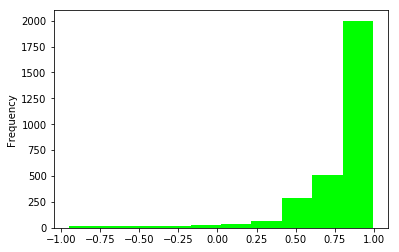

In [48]:
train.compound_score.plot(kind="hist", color="lime")

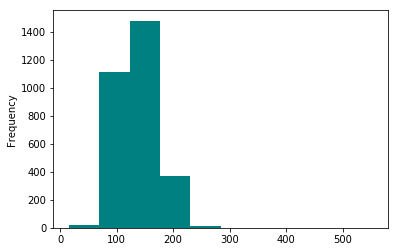

In [46]:
train.length.plot(kind="hist", color="teal")

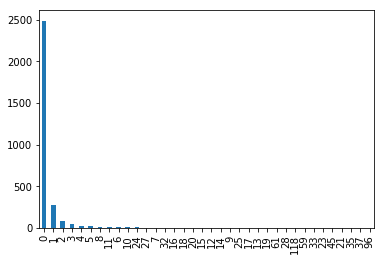

In [53]:
train['retweet_count'].value_counts().plot(kind="bar")

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


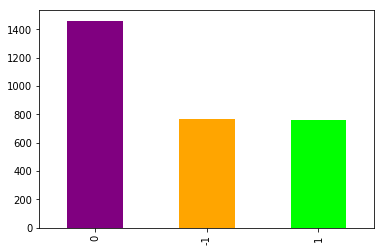

In [49]:
train.sentiment_class.value_counts().plot(kind='bar', colors=['purple', 'orange', 'lime'])

# Step4: Import Test Data

In [58]:
test = pd.read_csv('test.csv')

test.shape

(1387, 5)

In [59]:
test.head(5)

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [60]:
#CREATING A COLUMN NAMED CLEAN_TEXT WHICH STORES CLEANED TEXT 
test['clean_text']=test['original_text'].apply(lambda x: tweet_to_words(x))

#CREATING A COLUMN NAMED COMPOUND SCORE WITH SENTIMENT INTENSITY AS ITS VALUE 
test['compound_score'] = test['original_text'].apply(lambda x : polar_score(x))

#CREATING A COLUMN NAMED LENGTH WITH LENGTH OF REVIEWS AS ITS VALUE
test['length'] = test['clean_text'].apply(lambda x: len(x) - x.count(" "))

In [62]:
test.head()

,id,original_text,lang,retweet_count,original_author,clean_text,compound_score,length
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood,yeah cooked potatoes years old mean threw bag ...,0.8172,149
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii,happy mother day mums step mums grandmothers d...,0.5719,117
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg,love people uk however awoke saw mothersday tr...,0.9627,126
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters,happy st birthday happy mother day mum see tod...,0.6705,130
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg,happy mothers day wonderful mothers world live...,0.8126,94


# Step5: Creating a common vocabulary for TRAIN and TEST data

In [ ]:
# train = 2994
# test  = 1387

In [79]:
common_df = pd.DataFrame(pd.concat([train["clean_text"], test["clean_text"]])).reset_index(drop=True)

In [98]:
common_df = pd.concat([train["clean_text"], test["clean_text"]]).reset_index(drop=True)

In [99]:
common_df.head()

0    happy mothersday amazing mothers know hard abl...
1    happy mothers day mum sorry bring mothers day ...
2    happy mothers day mothers days work today quie...
3    happy mothers day beautiful woman royalty soot...
4    remembering amazing ladies made late grandmoth...
Name: clean_text, dtype: object

In [100]:
type(common_df)

pandas.core.series.Series

In [101]:
len(common_df)

4381

In [102]:
common_df[0]

'happy mothersday amazing mothers know hard able see mothers today us protect vulnerable members society beatcoronavirus pic twitter com va nfjfq b'

Once the dataset has been imported, the next step is to preprocess the text. Text may contain numbers, special characters, and unwanted spaces. Depending upon the problem we face, we may or may not need to remove these special characters and numbers from text. However, for the sake of explanation, we will remove all the special characters, numbers, and unwanted spaces from our text

In [104]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(common_df)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(common_df[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

The following script uses the bag of words model to convert text documents into corresponding numerical features

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [106]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

To convert values obtained using the bag of words model into TFIDF values, execute the following script

In [107]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [108]:
X

array([[0.47230192, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24977052, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
x_df = pd.DataFrame(X)

In [114]:
for col in x_df.columns:
    new_col = "Column_" + str(col)
    #print(new_col)
    x_df.rename(columns={col:new_col}, inplace=True)

In [264]:
x_df.shape

(4381, 500)

In [327]:
train_x_df = x_df[:2994]
test_x_df = x_df[2994:]

In [336]:
test_x_df.reset_index(drop=True, inplace=True)

In [337]:
train_new = pd.concat([train, train_x_df], axis=1)
test_new = pd.concat([test, test_x_df], axis=1, ignore_index=True)

# Step6: Separating X and Y

In [345]:
train_new.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class', 'clean_text', 'compound_score', 'length', 'Column_0',
       ...
       'Column_490', 'Column_491', 'Column_492', 'Column_493', 'Column_494',
       'Column_495', 'Column_496', 'Column_497', 'Column_498', 'Column_499'],
      dtype='object', length=509)

## 6.1 Re-setting Index Before Splitting

In [346]:
train_new.reset_index(drop=True, inplace=True)
test_new.reset_index(drop=True, inplace=True)

## 6.2 Split Data

In [347]:
x = train_new.drop(['id', 'original_text', 'lang', 'original_author', 'sentiment_class', 'clean_text'], axis=1)
y = train_new['sentiment_class']

In [348]:
x.shape

(2994, 503)

## 6.3 Fill Data for NaNs or Infinity

In [349]:
x.fillna(x.median(), inplace=True)

In [350]:
for col in x.columns:
    x[col] = x[col].apply(lambda x: x.median() if x == np.inf or x == -np.inf else x)

In [351]:
x["length"].dtype

dtype('int64')

In [352]:
x.columns[1:]

Index(['compound_score', 'length', 'Column_0', 'Column_1', 'Column_2',
       'Column_3', 'Column_4', 'Column_5', 'Column_6', 'Column_7',
       ...
       'Column_490', 'Column_491', 'Column_492', 'Column_493', 'Column_494',
       'Column_495', 'Column_496', 'Column_497', 'Column_498', 'Column_499'],
      dtype='object', length=502)

In [353]:
for col in x.columns[1:]:
    x[col] = x[col].apply(lambda x: float("{:.2f}".format(x)) )

In [354]:
for col in x.columns:
    x[col] = x[col].astype(np.float64)

In [355]:
x.reset_index(drop=True, inplace=True)

In [356]:
for col in x.columns:
    x[col] = x[col].apply(lambda x: x.median() if x == "" else x)

# Step7: Creating Train and Test Set In Ratio 80:20

In [305]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [306]:
print("X_train: ", X_train.shape) 
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape) 
print("y_test: ", y_test.shape)

X_train:  (2395, 503)
X_test:  (599, 503)
y_train:  (2395,)
y_test:  (599,)


In [307]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [246]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Bhuwanesh\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False Fal

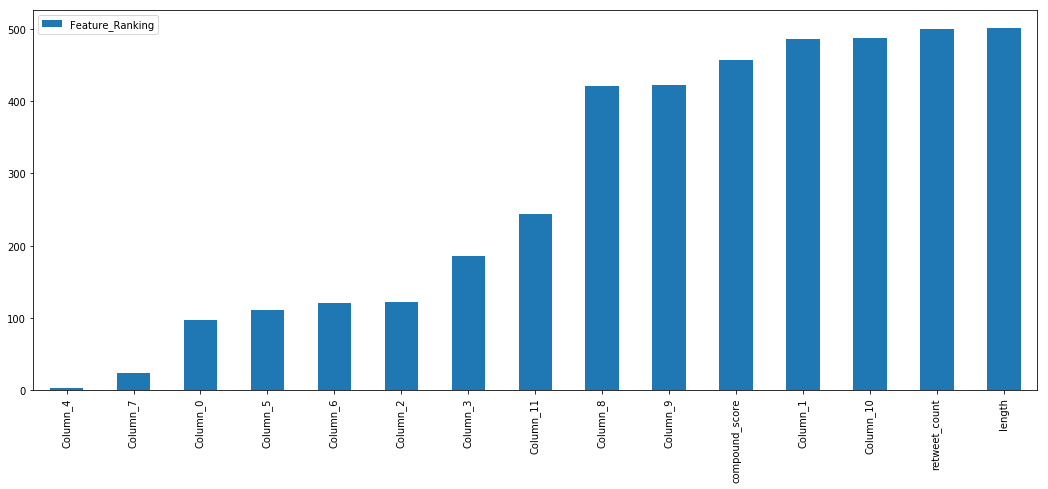

In [247]:
df_feat[:15].sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score

### 6.2.1 Decision Trees

In [248]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.41569282136894825
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[ 13 127  21]
 [ 30 221  38]
 [ 15 119  15]]
              precision    recall  f1-score   support

          -1       0.22      0.08      0.12       161
           0       0.47      0.76      0.58       289
           1       0.20      0.10      0.13       149

    accuracy                           0.42       599
   macro avg       0.30      0.32      0.28       599
weighted avg       0.34      0.42      0.35       599



### 6.2.2 Random Forest

In [249]:
# Fit RF on full data

from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest:  0.43906510851419034
Confusion matrix 
 [[  4 143  14]
 [ 20 249  20]
 [  5 134  10]]
              precision    recall  f1-score   support

          -1       0.14      0.02      0.04       161
           0       0.47      0.86      0.61       289
           1       0.23      0.07      0.10       149

    accuracy                           0.44       599
   macro avg       0.28      0.32      0.25       599
weighted avg       0.32      0.44      0.33       599



In [358]:
# Fit RF on full data

from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(x, y)


In [427]:
from sklearn.ensemble import AdaBoostClassifier

#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_adab.predict(X_test)

#Check Prediction Score
print("Accuracy of Adaboost Classifier: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Adaboost Classifier:  0.4724540901502504
Confusion matrix 
 [[  0 167   2]
 [  3 283   0]
 [  1 143   0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       169
           0       0.48      0.99      0.64       286
           1       0.00      0.00      0.00       144

    accuracy                           0.47       599
   macro avg       0.16      0.33      0.21       599
weighted avg       0.23      0.47      0.31       599



In [428]:
from sklearn.ensemble import AdaBoostClassifier

#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(x, y)

# Final Step: Generating prediction on Test data

In [401]:
test_new = pd.concat([test, test_x_df], axis=1)

In [402]:
test_new.shape

(1387, 508)

In [403]:
test_new.dtypes

id                 float64
original_text       object
lang                object
retweet_count       object
original_author     object
                    ...   
Column_495         float64
Column_496         float64
Column_497         float64
Column_498         float64
Column_499         float64
Length: 508, dtype: object

In [410]:
import re

In [412]:
def check_integer(x):
    try:
        num = int(x) 
        return x
    except: 
        return 0

In [413]:
test_new["retweet_count"] = test_new["retweet_count"].apply(lambda x: check_integer(x))

In [416]:
test_for_prediction = test_new.drop(['id', 'original_text', 'lang', 'original_author', 'clean_text'], axis=1)

In [417]:
for col in test_for_prediction.columns:
    test_for_prediction[col] = test_for_prediction[col].astype(np.float64)

In [418]:
test_for_prediction.fillna(test_for_prediction.median(), inplace=True)

for col in test_for_prediction.columns:
    test_for_prediction[col] = test_for_prediction[col].apply(lambda x: x.median() if x == np.inf or x == -np.inf else x)

for col in test_for_prediction.columns[1:]:
    test_for_prediction[col] = test_for_prediction[col].apply(lambda x: float("{:.2f}".format(x)))

test_for_prediction.reset_index(drop=True, inplace=True)



In [419]:
test_for_prediction.head()

,retweet_count,compound_score,length,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,...,Column_490,Column_491,Column_492,Column_493,Column_494,Column_495,Column_496,Column_497,Column_498,Column_499
0,0.0,0.82,149.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0,0.0
1,0.0,0.57,117.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.96,126.0,0.0,0.0,0.35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,1.0,0.67,130.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.81,94.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [425]:
#Predict

prediction_from_dt  = best_clf_dt.predict(test_for_prediction)
df_prediction_from_dt = pd.DataFrame({'id':test_new['id'], 'sentiment_class': prediction_from_dt})
df_prediction_from_dt.to_csv("Final_output_prediction_from_dt.csv")
df_prediction_from_dt.head()


,id,sentiment_class
0,1.246628e+18,0
1,1.245898e+18,0
2,1.244717e+18,0
3,1.245730e+18,1
4,1.244636e+18,0


In [426]:
prediction_from_rf  = best_clf_rf.predict(test_for_prediction)
df_prediction_from_rf = pd.DataFrame({'id':test_new['id'], 'sentiment_class': prediction_from_rf})
df_prediction_from_rf.to_csv("Final_output_prediction_from_rf.csv")
df_prediction_from_rf.head()

,id,sentiment_class
0,1.246628e+18,1
1,1.245898e+18,0
2,1.244717e+18,0
3,1.245730e+18,0
4,1.244636e+18,0


In [429]:
prediction_from_adab  = best_clf_adab.predict(test_for_prediction)
df_prediction_from_adab = pd.DataFrame({'id':test_new['id'], 'sentiment_class': prediction_from_adab})
df_prediction_from_adab.to_csv("Final_output_prediction_from_adab.csv")
df_prediction_from_adab.head()

,id,sentiment_class
0,1.246628e+18,0
1,1.245898e+18,0
2,1.244717e+18,0
3,1.245730e+18,0
4,1.244636e+18,0
